In [1]:
import numpy as np

# Load dataset
data = np.genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)

# Get the number of samples
N = data.shape[0]

# Separate features (X) and target (y)
X = data[:, :3]   # First three columns as features
y = data[:, 3]    # Last column as target

# Normalize input data using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]  # Add intercept term (ones) for bias
    return X_b, maxi, mini, avg

# Perform mean normalization
X_b, maxi, mini, avg = mean_normalization(X)
print(X_b)

[[ 1.00000000e+00  5.50426788e-01 -9.83586370e-02  7.57928475e-03]
 [ 1.00000000e+00 -7.57540486e-02 -9.32979082e-02 -7.37297571e-02]
 [ 1.00000000e+00 -1.67859312e-01 -7.10307018e-02  7.91666667e-03]
 [ 1.00000000e+00  2.85244602e-01 -8.65502699e-02 -2.85205803e-02]
 [ 1.00000000e+00  3.84097503e-01 -1.89451754e-01 -2.88579622e-02]
 [ 1.00000000e+00 -1.96536775e-01 -6.09092443e-02  2.71474359e-02]
 [ 1.00000000e+00 -3.18943995e-02 -1.15227733e-01 -1.46604251e-01]
 [ 1.00000000e+00  1.79644062e-01 -1.59762146e-01 -1.86752699e-01]
 [ 1.00000000e+00 -1.96874157e-01 -2.18803981e-01 -2.22515182e-01]
 [ 1.00000000e+00  4.48200067e-01 -2.17117072e-01 -1.54364035e-01]
 [ 1.00000000e+00 -2.87955466e-03 -2.06320850e-01 -1.44242578e-01]
 [ 1.00000000e+00  4.98469973e-01 -1.44917341e-01 -2.12393725e-01]
 [ 1.00000000e+00 -1.45592105e-01 -1.07467949e-01 -3.55431849e-03]
 [ 1.00000000e+00  1.03058367e-01 -2.00247976e-01 -2.01597503e-01]
 [ 1.00000000e+00  4.62707490e-01 -1.14890351e-01 -7.06933198e

In [2]:
print('Max:', maxi)
print('Min:', mini)
print('Avg:', avg)

Max: 296.4
Min: 0.0
Avg: 66.95349999999999


In [3]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1)  # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0]

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N)  # In real application, you should use this code
            random_index = i  # This code is used for this assignment only

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute output
            y_pred = xi.dot(thetas)

            # Compute loss li
            li = ((y_pred - yi) ** 2) / 2

            # Compute gradient for loss
            gradient = xi.T.dot(y_pred - yi)

            # Compute gradient
            # (This step is redundant in this case, as we've already computed the gradient)

            # update theta
            thetas = thetas - learning_rate * gradient

            # logging
            thetas_path.append(thetas)
            losses.append(li[0, 0])

    return thetas_path, losses

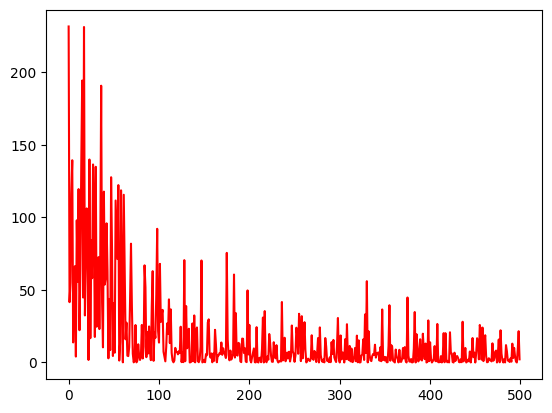

In [4]:
import matplotlib.pyplot as plt

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

1.

In [5]:
sgd_theta, losses = stochastic_gradient_descent(
    X_b, 
    y, 
    n_epochs=1, 
    learning_rate=0.01
)
print(np.sum(losses))

6754.643359356192


2.

In [6]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 
                                       185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 
                                       173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 
                                       77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 
                                       90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 
                                       100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 
                                       58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 
                                       106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # compute output
            y_pred = xi.dot(thetas)

            # compute loss
            loss = (1 / (2 * minibatch_size)) * np.sum((y_pred - yi) ** 2)

            # compute derivative of loss
            dL_dy_pred = (1 / minibatch_size) * (y_pred - yi)

            # compute derivative of parameters
            gradients = xi.T.dot(dL_dy_pred)

            # update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

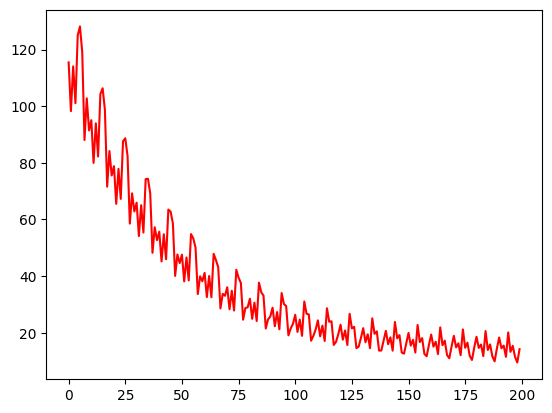

In [8]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,
                                                  minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [9]:
mbgd_thetas, losses = mini_batch_gradient_descent(
    X_b,
    y,
    n_epochs=50,
    minibatch_size=20,
    learning_rate=0.01
)

print(round(sum(losses), 2))

11242.82


3.

In [10]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0]  # Number of samples

    for i in range(n_epochs):
        # compute output
        y_pred = X_b.dot(thetas)

        # Compute loss
        loss = (1 / (2 * N)) * np.sum((y_pred - y) ** 2)

        # Compute loss's derivative
        dL_dy_pred = (1 / N) * (y_pred - y)

        # compute parameters' derivative
        gradients = X_b.T.dot(dL_dy_pred)

        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses

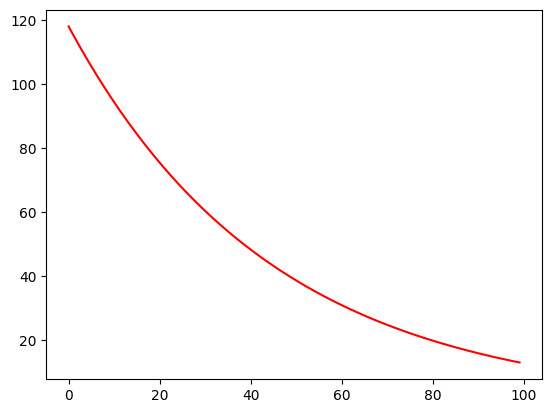

In [11]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()